In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Generic Packages
import numpy as np
import os
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd

#Plotting Libraries
import seaborn as sn; sn.set(font_scale=1.4)
import matplotlib.pyplot as plt

#openCV
import cv2

#Tensor Flow
import tensorflow as tf

#Display Progress
from tqdm import tqdm

from skimage.transform import resize
from skimage.io import imread
from sklearn.model_selection import train_test_split


from keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model

In [3]:
categories = []
rootdir = '/content/drive/MyDrive/project3/data/practice_image/flower_images'
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
      categories.append(file)

categories_label = {category:i for i, category in enumerate(categories)} # 카테고리랑 숫자로 바꾼 값 dict형태로 만들기

In [4]:
categories_label

{'rose flower': 0,
 'sunflower flower': 1,
 'marigold flower': 2,
 'daisy flower': 3}

In [5]:
def load_data():

  rootdir = '/content/drive/MyDrive/project3/data/practice_image/flower_images'
  images = []
  labels = []
# Iterate through each folder corresponding to a category
  for category in categories:
    path = os.path.join(rootdir,category)
    label = categories_label[category]

# Iterate through each image in our folder
    for img in tqdm(os.listdir(path)):
      try:
        # Get the path name of the image
        img_path = os.path.join(path, img)

        # Open and resize the img
        image = cv2.imread(img_path)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(224, 224))

        # Append the image and its corresponding label to the output
        images.append(image)
        labels.append(label)
      except Exception as someReadingError:
        pass

  return images , labels

In [6]:
#Loading Data (Training & Test Dataset)
Images, Labels = load_data()

100%|██████████| 50/50 [01:11<00:00,  1.43s/it]


In [7]:
X=np.array(Images)
Y=np.array(Labels)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
resnet_model = ResNet50()

102967424/102967424 [==============================] - 5s 0us/step


In [10]:
x = Flatten()(resnet_model.output)

In [11]:
prediction = Dense(4, activation='softmax')(x)
model = Model(inputs=resnet_model.input, outputs=prediction)

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,epochs = 20,validation_split = 0.2)

Epoch 1/20
4/4 [==============================] - 47s 2s/step - loss: 1.3576 - accuracy: 0.7244 - val_loss: 1.3790 - val_accuracy: 0.3125
Epoch 2/20
4/4 [==============================] - 1s 353ms/step - loss: 1.3251 - accuracy: 0.9528 - val_loss: 1.3882 - val_accuracy: 0.2500
Epoch 3/20
4/4 [==============================] - 1s 349ms/step - loss: 1.3222 - accuracy: 0.8740 - val_loss: 1.3872 - val_accuracy: 0.2500
Epoch 4/20
4/4 [==============================] - 1s 367ms/step - loss: 1.3346 - accuracy: 0.7480 - val_loss: 1.3864 - val_accuracy: 0.3125
Epoch 5/20
4/4 [==============================] - 1s 351ms/step - loss: 1.3131 - accuracy: 0.8661 - val_loss: 1.4011 - val_accuracy: 0.1875
Epoch 6/20
4/4 [==============================] - 1s 371ms/step - loss: 1.3036 - accuracy: 0.8898 - val_loss: 1.4032 - val_accuracy: 0.1875
Epoch 7/20
4/4 [==============================] - 1s 356ms/step - loss: 1.2959 - accuracy: 0.8976 - val_loss: 1.4045 - val_accuracy: 0.1875
Epoch 8/20
4/4 [======

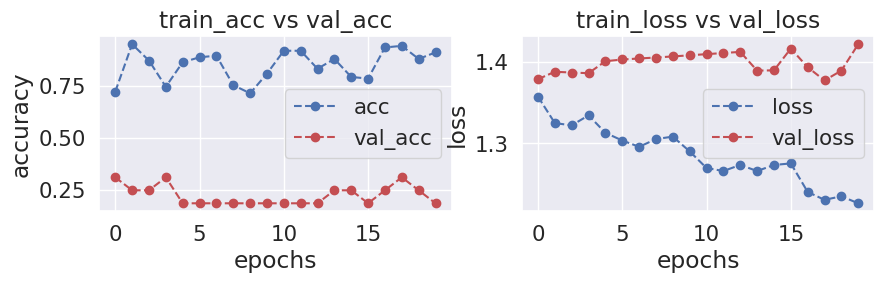

In [14]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

plot_accuracy_loss(history)

In [15]:
predictions = model.predict(X_test)

# Convert the logits to probabilities
probabilities = tf.nn.softmax(predictions)

# Get the class with the highest probability
predicted_classes = np.argmax(probabilities, axis=1)

# Compare the predicted classes with the actual classes
comparison = list(zip(predicted_classes, y_test))

# Display the first 10 predictions and actual values
for i in range(10):
    print(f'Predicted: {predicted_classes[i]}, Actual: {y_test[i]}')

2/2 [==============================] - 5s 1s/step
Predicted: 0, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 2
Predicted: 0, Actual: 3
Predicted: 0, Actual: 1
Predicted: 0, Actual: 3
Predicted: 0, Actual: 1
Predicted: 0, Actual: 1
Predicted: 0, Actual: 2
Predicted: 0, Actual: 3
